## Natural Language Understanding || Assignment 2

Submitted by:
- Debonil Ghosh (M21AIE225)
- Ravi Shankar Kumar (M21AIE247) 
- Saurav Chowdhury (M21AIE256)

Question 1 : Releation classifier

In [2]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, f1_score
from sklearn.ensemble import RandomForestClassifier


Data Preparation

In [14]:
import json

data = []
with open('data/train.json', 'r', encoding='utf-8') as file:
    for line in file:
        data.append(json.loads(line))

In [17]:
passages = []
relations = []
print(f'Original document count = {len(data)}')
for d in data:
    for p in d['passages']:
        for f in p['facts']:
                passages.append(f['annotatedPassage'])
                relations.append(f['propertyId'])
print(f'Total fact count = {len(passages)}')

Original document count = 3977
Total fact count = 10895


In [18]:

# Vectorize using Bag of Words
vectorizer = CountVectorizer()
text_vectors = vectorizer.fit_transform(passages)

# Concatenate subject and object vectors
X = text_vectors
y = np.array(relations)

Split data into training and testing sets

In [19]:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

#### Train the classifier

In [20]:
# Train the classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Evaluation part

In [21]:
import pandas as pd
relations_df = pd.read_csv('data/relations.csv')
classes = relations_df['propertyName'].values
classes


array(['SUBSIDIARY_OF', 'NATIONALITY', 'PLACE_OF_RESIDENCE',
       'PLACE_OF_BIRTH', 'DATE_OF_DEATH', 'DATE_OF_BIRTH', 'FOUNDED_BY',
       'SPOUSE', 'EMPLOYEE_OR_MEMBER_OF', 'CHILD_OF', 'CEO',
       'POLITICAL_AFFILIATION', 'DATE_FOUNDED', 'HEADQUARTERS',
       'EDUCATED_AT'], dtype=object)

In [22]:
import pandas as pd
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
import seaborn as sns


def confusionMatrixAndAccuracyReport(Y_test, Y_pred, classes, title=''):
    cm = metrics.confusion_matrix(Y_test, Y_pred)
    overallAccuracy = metrics.accuracy_score(Y_test, Y_pred)

    classwiseAccuracy = cm.diagonal()/cm.sum(axis=1)

    f1_score = metrics.f1_score(Y_test, Y_pred, average='weighted')

    plt.figure(figsize=(15, 15))
    plt.title(
        f'{title} : Accuracy : {overallAccuracy*100:3.2f}% | F1 Score : {f1_score*100:3.2f}% ', size=14)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    cm = pd.DataFrame(cm, index=classes, columns=classes)
    cm.index.name = 'True Label'
    cm.columns.name = 'Predicted Label'
    sns.heatmap(data=cm, annot=True, square=True,  cmap='Blues',
                fmt='g', xticklabels=classes, yticklabels=classes)

    plt.savefig(f'results/confusion_mat_{title}.png', bbox_inches='tight')
    plt.show()
    print(f'Accuracy: {overallAccuracy*100:3.3f}%')
    print(f'F1 Score: {f1_score*100:3.3f}%')
    classwiseAccuracy_df = pd.DataFrame(
        data=[classwiseAccuracy], columns=classes)
    print(
        f'\nClasswise Accuracy Score: \n{classwiseAccuracy_df.to_markdown(index=False)}')
    print('\nConfusion Matrix:')
    print(cm.to_markdown())
    return overallAccuracy


Predicted class => 34
accuracy_score :: 0.796
f1_score ::0.792
              precision    recall  f1-score   support

           1       0.89      0.93      0.91        76
          10       0.73      0.54      0.62       120
          11       0.82      0.85      0.84       234
          12       0.62      0.74      0.67       178
          14       0.89      0.87      0.88       100
          15       0.56      0.46      0.50       146
           2       0.61      0.61      0.61       109
          25       0.89      0.88      0.89       236
           3       0.83      0.91      0.87       270
          34       0.81      0.88      0.84       124
           4       0.82      0.71      0.76       112
          45       0.79      0.92      0.85        96
           5       0.79      0.59      0.67        82
           6       0.93      0.92      0.93       145
           9       0.89      0.87      0.88       151

    accuracy                           0.80      2179
   macro avg     

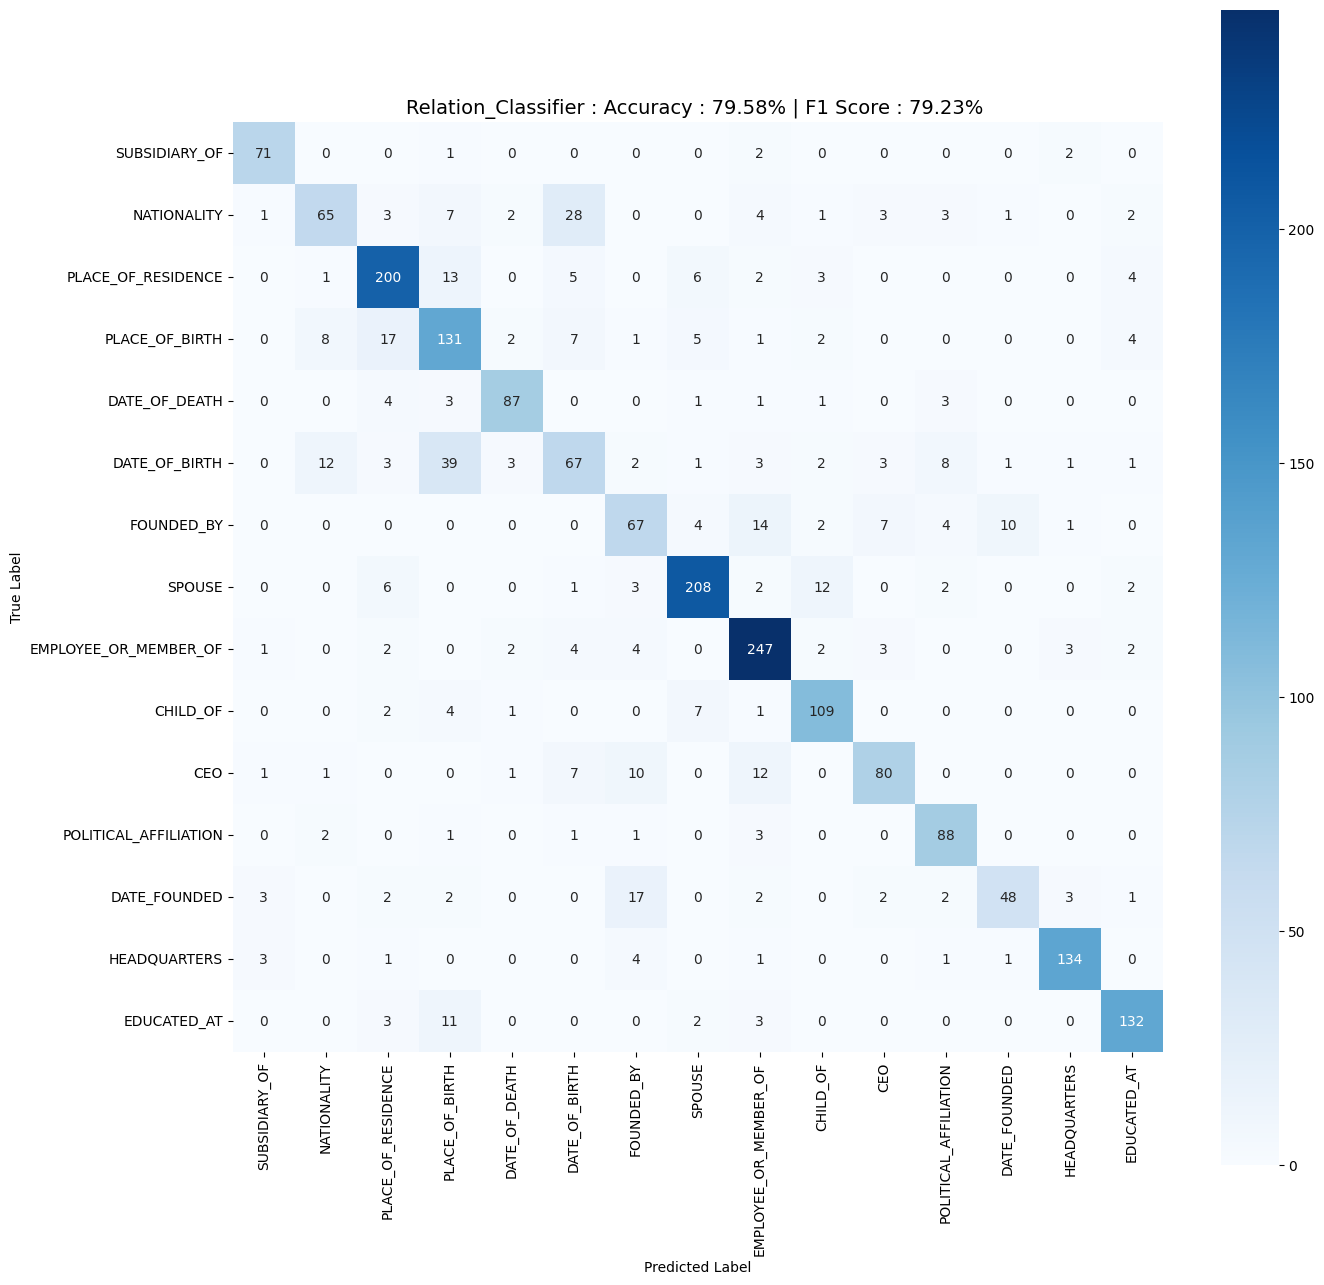

Accuracy: 79.578%
F1 Score: 79.226%

Classwise Accuracy Score: 
|   SUBSIDIARY_OF |   NATIONALITY |   PLACE_OF_RESIDENCE |   PLACE_OF_BIRTH |   DATE_OF_DEATH |   DATE_OF_BIRTH |   FOUNDED_BY |   SPOUSE |   EMPLOYEE_OR_MEMBER_OF |   CHILD_OF |      CEO |   POLITICAL_AFFILIATION |   DATE_FOUNDED |   HEADQUARTERS |   EDUCATED_AT |
|----------------:|--------------:|---------------------:|-----------------:|----------------:|----------------:|-------------:|---------:|------------------------:|-----------:|---------:|------------------------:|---------------:|---------------:|--------------:|
|        0.934211 |      0.541667 |             0.854701 |         0.735955 |            0.87 |        0.458904 |     0.614679 | 0.881356 |                0.914815 |   0.879032 | 0.714286 |                0.916667 |       0.585366 |       0.924138 |      0.874172 |

Confusion Matrix:
| True Label            |   SUBSIDIARY_OF |   NATIONALITY |   PLACE_OF_RESIDENCE |   PLACE_OF_BIRTH |   DATE_OF_DEATH |

0.7957778797613584

In [23]:

# Evaluate the classifier
y_pred = clf.predict(X_test)
print(f'Predicted class => {y_pred[10]}')
print(f'accuracy_score :: {metrics.accuracy_score(y_test, y_pred):0.3f}')
print(f'f1_score ::{metrics.f1_score(y_test, y_pred,average="weighted"):0.3f}')
print(metrics.classification_report(y_test, y_pred))
confusionMatrixAndAccuracyReport(
    y_test, y_pred, classes, title='Relation_Classifier')


### Saving model  for future use

In [24]:
from joblib import dump
dump(clf, 'models/relation_classifer.joblib') 

['models/relation_classifer.joblib']